In [1]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree


In [9]:
df = pd.read_csv('Mobile_Device_Usage (1).csv')
df.shape

(700, 11)

In [10]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [11]:
df.drop(['User ID'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of            Device Model Operating System  App Usage Time (min/day)  \
0        Google Pixel 5          Android                       393   
1             OnePlus 9          Android                       268   
2          Xiaomi Mi 11          Android                       154   
3        Google Pixel 5          Android                       239   
4             iPhone 12              iOS                       187   
..                  ...              ...                       ...   
695           iPhone 12              iOS                        92   
696        Xiaomi Mi 11          Android                       316   
697      Google Pixel 5          Android                        99   
698  Samsung Galaxy S21          Android                        62   
699           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1        

In [13]:
df['Gender'] = df['Gender'].factorize()[0] # label encoding
df['Device Model'] = df['Device Model'].factorize()[0]
df['Operating System'] = df['Operating System'].factorize()[0]
df.head

<bound method NDFrame.head of      Device Model  Operating System  App Usage Time (min/day)  \
0               0                 0                       393   
1               1                 0                       268   
2               2                 0                       154   
3               0                 0                       239   
4               3                 1                       187   
..            ...               ...                       ...   
695             3                 1                        92   
696             2                 0                       316   
697             0                 0                        99   
698             4                 0                        62   
699             1                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2        

Depth = 1, train_acc = 0.4245, eval_acc = 0.3619
Depth = 2, train_acc = 0.8122, eval_acc = 0.7714
Depth = 3, train_acc = 1.0000, eval_acc = 1.0000
Depth = 4, train_acc = 1.0000, eval_acc = 1.0000
Depth = 5, train_acc = 1.0000, eval_acc = 1.0000
Depth = 6, train_acc = 1.0000, eval_acc = 1.0000
Depth = 7, train_acc = 1.0000, eval_acc = 1.0000
Depth = 8, train_acc = 1.0000, eval_acc = 1.0000


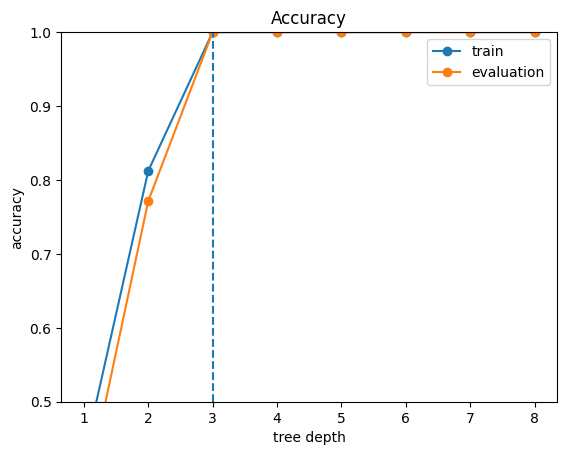

In [15]:
# Separate the Titanic data into features and target class.
y = df['User Behavior Class']
x = df.drop('User Behavior Class', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 3, test_acc = 1.0000


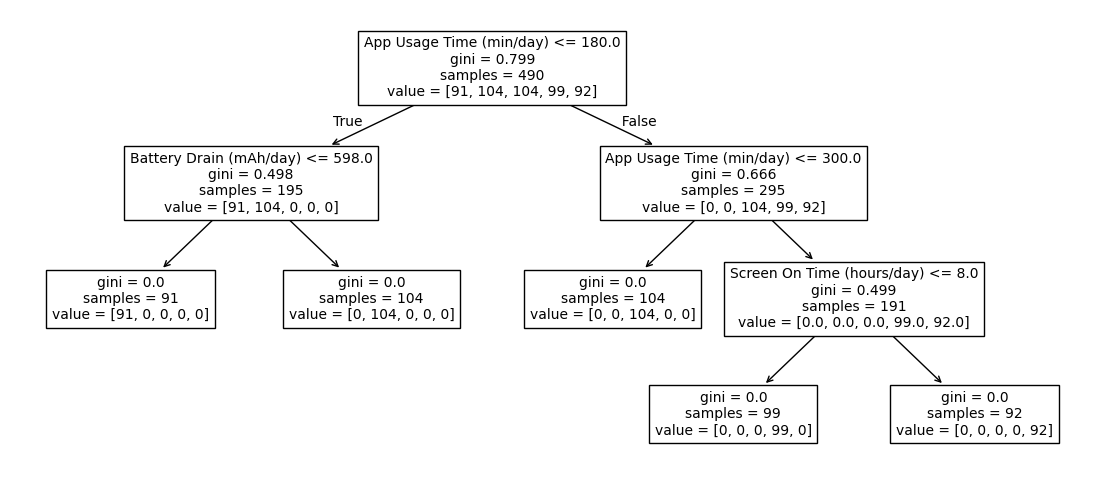

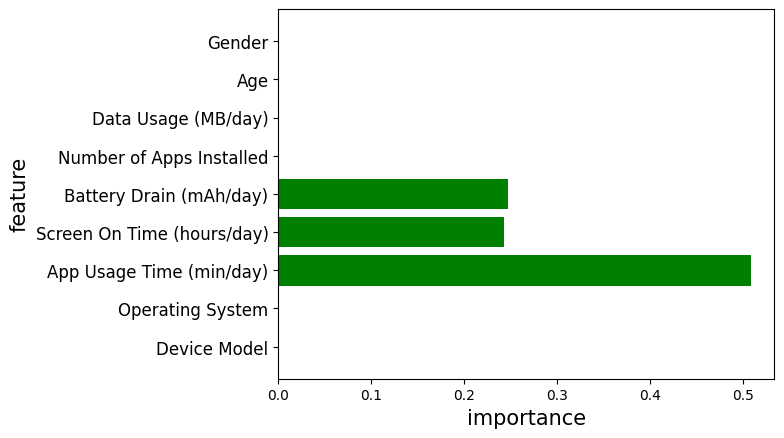

feature importance = [0.    0.    0.509 0.243 0.248 0.    0.    0.    0.   ]


In [16]:
# I set max_step=3 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))